In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from sklearn.model_selection import train_test_split

/Users/neiljanwani/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
imu_df = pd.read_csv(r'AB06/ik.csv').astype('float').set_index('Header')

In [38]:
len(imu_df.columns)

23

In [39]:
def plot(dataframe, pergraph):
    RANGE = (3000,4000)
    keys = dataframe.keys()
    fig, ax = plt.subplots((len(dataframe.columns)) // pergraph)
    fig.set_size_inches(20,3 * len(ax))
    fig.tight_layout()
    idx = 0
    for key in keys:
        ax[int(idx / pergraph)].plot(dataframe.index[RANGE[0]:RANGE[1]],dataframe[key].values[RANGE[0]:RANGE[1]])
        ax[int(idx / pergraph)].set_title(key.upper())
        idx += 1

    plt.show()

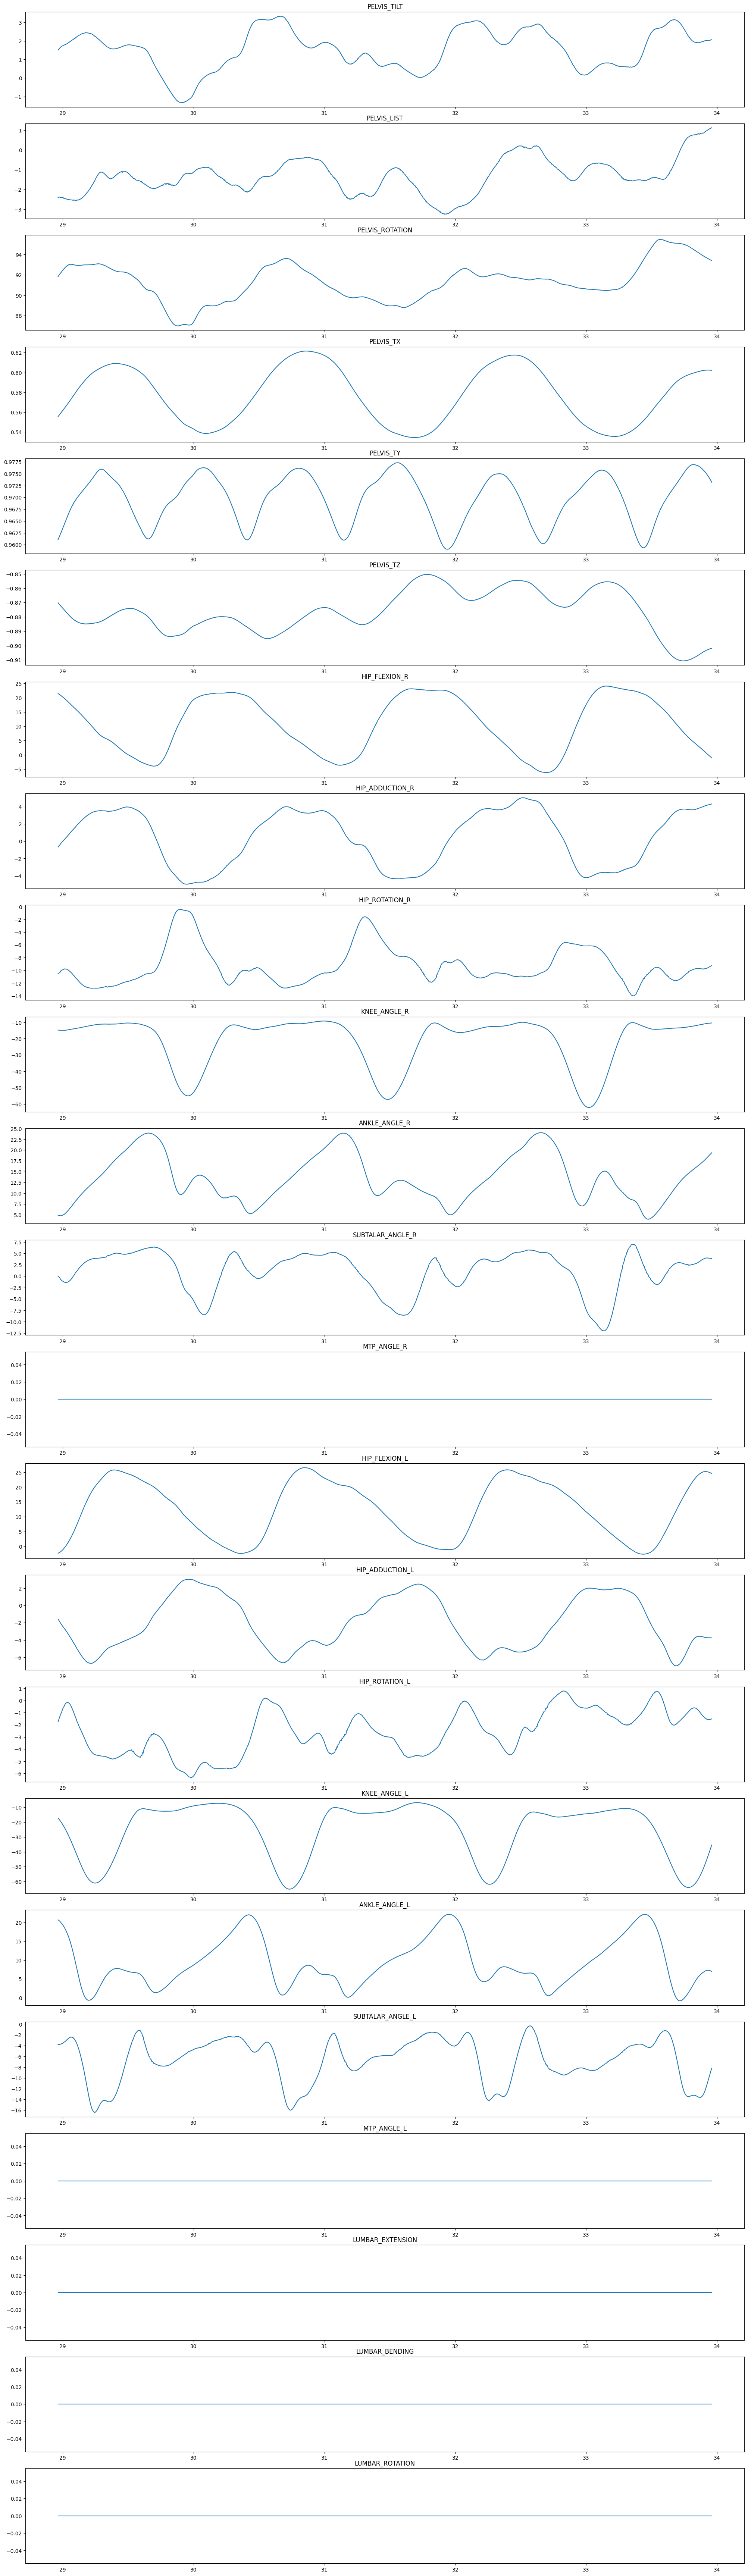

In [40]:
plot(imu_df,1)

In [41]:
def mean(x):
    return np.mean(x)

def median(x):
    return np.median(x)

def stddev(x):
    return np.std(x)

def first(x):
    return list(x)[0]

def last(x):
    return list(x)[-1]

def maximum(x):
    return np.max(x)

def minimum(x):
    return np.min(x)

In [58]:
def pre_process(df,
                window_size=300,
                funcs=[mean, median, stddev, first, last, maximum, minimum],
                filename=None,
                datalim=float('inf'),
                keys=None):
    if not keys: keys = df.keys()[1:]
    newdf = pd.DataFrame()
    for key in tqdm(keys):
        for func in funcs:
            name = f'{key}_{func.__name__}'
            data = []
            for i in range(min(datalim,len(df[key]) - window_size)):
                data.append(func(df[key].values[i:i+window_size]))
            newdf.insert(len(newdf.columns),column=name,value=data)

    newdf = newdf.set_index(df.index[:min(datalim,len(df[key]) - window_size)])
    return newdf

In [233]:
p_df = pre_process(imu_df,
                   keys=['ankle_angle_r', 'subtalar_angle_r'],
                   window_size=300)

# for c in p_df.columns:
#     mean = p_df[c].mean()
#     stdev = p_df[c].std()

#     p_df[c] = (p_df[c] - mean) / stdev

#     p_df[c] = (p_df[c] - p_df[c].min()) / (p_df[c].max() - p_df[c].min())

p_df


100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


,ankle_angle_r_mean,ankle_angle_r_median,ankle_angle_r_stddev,ankle_angle_r_first,ankle_angle_r_last,ankle_angle_r_maximum,ankle_angle_r_minimum,subtalar_angle_r_mean,subtalar_angle_r_median,subtalar_angle_r_stddev,subtalar_angle_r_first,subtalar_angle_r_last,subtalar_angle_r_maximum,subtalar_angle_r_minimum
Header,,,,,,,,,,,,,,
13.965,13.155593,12.358000,4.280592,23.013101,20.294309,23.179649,6.428558,1.663267,2.179431,3.059378,6.288613,4.530810,6.288613,-4.699694
13.970,13.147109,12.358000,4.263535,23.070557,20.467913,23.179649,6.428558,1.657456,2.179431,3.052235,6.260538,4.545289,6.260538,-4.699694
13.975,13.139019,12.358000,4.246966,23.116774,20.643310,23.179649,6.428558,1.651683,2.179431,3.045153,6.229074,4.528798,6.229074,-4.699694
13.980,13.131410,12.358000,4.231098,23.153732,20.834078,23.179649,6.428558,1.646018,2.179431,3.038205,6.176367,4.529487,6.176367,-4.699694
13.985,13.124264,12.358000,4.215949,23.162112,21.010036,23.179649,6.428558,1.640761,2.179431,3.031719,6.135447,4.599248,6.135447,-4.699694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153.525,16.103199,14.250463,7.443155,3.065176,13.319580,30.662434,2.518892,-0.710667,-0.994721,3.856388,0.233900,-1.197677,5.380000,-8.199835
153.530,16.136881,14.250463,7.406852,2.887530,13.169895,30.662434,2.518892,-0.715072,-1.045923,3.856061,-0.032586,-1.087783,5.380000,-8.199835
153.535,16.170690,14.250463,7.369352,2.739347,13.029949,30.662434,2.518892,-0.718293,-1.045923,3.855893,-0.440775,-0.998840,5.380000,-8.199835


14


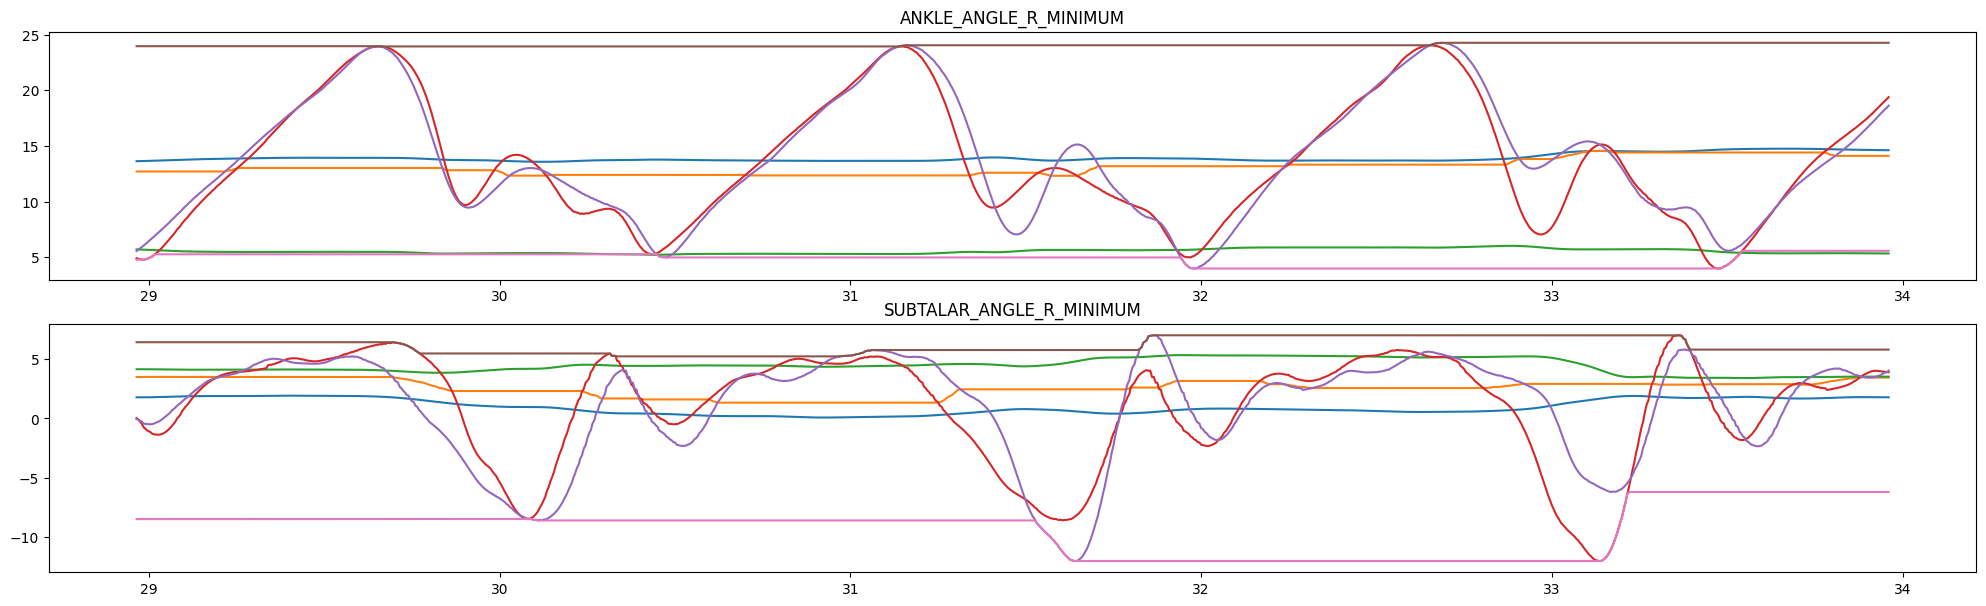

In [234]:
print(len(p_df.columns))
plot(p_df, 7)

14


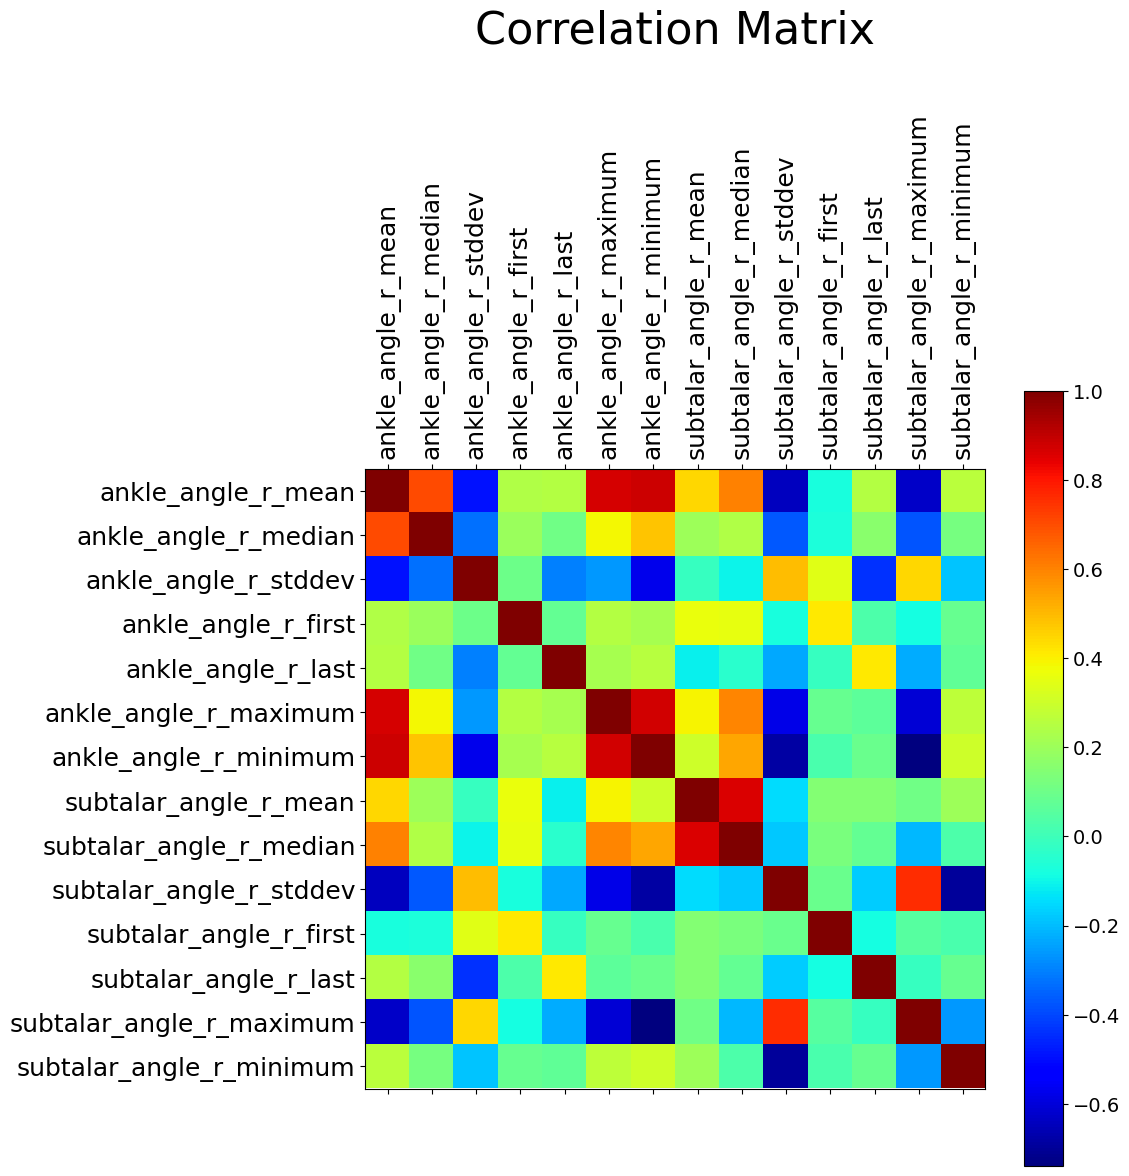

In [235]:
f = plt.figure(figsize=(10, 10))
plot_df = p_df
plt.matshow(plot_df.corr(), fignum=f.number, cmap='jet') # plasma
plt.xticks(
    range(plot_df.select_dtypes(['number']).shape[1]), 
    plot_df.keys(), 
    fontsize=18, rotation=90
)
plt.yticks(
    range(plot_df.select_dtypes(['number']).shape[1]), 
    plot_df.keys(), 
    fontsize=18
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=32, pad=50)
print(plot_df.select_dtypes(['number']).shape[1])

In [236]:
labels_df = pd.read_csv(r'AB06/fsr.csv').astype('float')
labels_df = labels_df.set_index('Header')
labels_df = labels_df / 100
labels_df[13.965:140]
# p_df = p_df[13.965:153]
# p_df = p_df.join(labels_df[13.965:153])
# print(len(p_df[13.965:153]),len(labels_df[13.965:153]))

,HeelStrike,ToeOff
Header,,
13.965,0.003003,0.826797
13.970,0.006006,0.830065
13.975,0.009009,0.833333
13.980,0.012012,0.836601
13.985,0.015015,0.839869
...,...,...
139.980,0.739669,0.609959
139.985,0.743802,0.614108
139.990,0.747934,0.618257


In [237]:
train_X, test_X, train_y, test_y = [torch.Tensor(i.values.astype(float)) for i in train_test_split(p_df[13.965:140],labels_df[13.965:140]['HeelStrike'], test_size=0.1,random_state=0, shuffle=False)]
# train_X, test_X, train_y, test_y = [torch.Tensor(i) for i in train_test_split(np.linspace(0,1,num=10000).reshape(-1,1), np.linspace(0,1,num=10000), train_size=0.7, shuffle=True)]

train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=50, shuffle=False) 

In [238]:
model = nn.Sequential(
          nn.Linear(14,25),
          nn.Sigmoid(),
          nn.Linear(25,12),
          nn.Sigmoid(),
          nn.Linear(12,1),
          nn.Sigmoid()
        )
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=False)
model.train()

Sequential(
  (0): Linear(in_features=14, out_features=25, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=25, out_features=12, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=12, out_features=1, bias=True)
  (5): Sigmoid()
)

In [239]:
def test(model,accuracies=None):
  testloader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=False) 

  model.eval()

  test_loss = 0
  correct = np.array([0] * len(accuracies))

  # Turning off automatic differentiation
  with torch.no_grad():
      for inputs, labels in testloader:
          output = model(inputs)
          # for o, t in zip(output, labels):
          #    print(o,t)
          # test_loss += loss_fn(output.squeeze(), labels).item()  # Sum up batch loss
          pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
          correct += [len([None for o, t in zip(output, labels) if abs(o - t) <= close]) for close in accuracies]
  test_loss /= len(testloader.dataset)
  return test_loss, correct / len(testloader.dataset)
  # print(f'{100. * correct / len(testloader.dataset)}%')
  # print(test_loss)

100%|██████████| 3000/3000 [13:12<00:00,  3.78it/s]


[[0.11503372 0.52836176 0.84371281 0.95001983 0.9591432 ]
 [0.11503372 0.52875843 0.84371281 0.95001983 0.9591432 ]
 [0.11424038 0.5291551  0.84331614 0.95001983 0.9591432 ]
 ...
 [0.12415708 0.61562872 0.8587862  0.95993653 0.96469655]
 [0.12455375 0.61562872 0.8587862  0.95993653 0.96469655]
 [0.12455375 0.61562872 0.85918286 0.95993653 0.96469655]]
0.01 0.12455374851249504
0.05 0.6156287187623959
0.1 0.8591828639428798
0.2 0.9599365331217771
0.25 0.9646965489884967


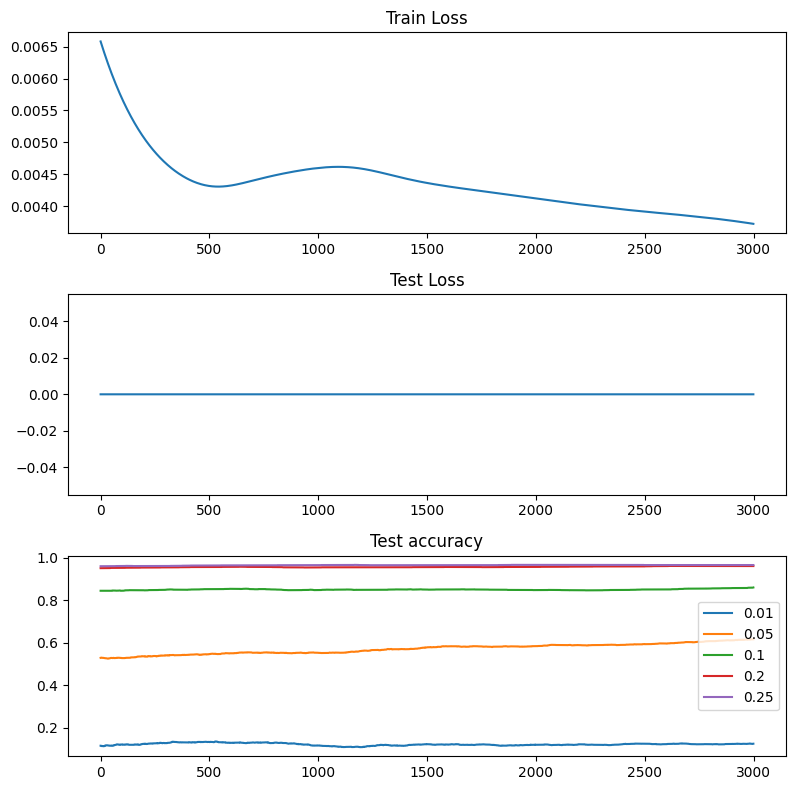

Finished Training


In [242]:
def train(accuracies=[0.01, 0.05, 0.1, 0.2, 0.25]):
  model.train()
  losses = []
  testlosses = []
  accs = []
  for epoch in tqdm(range(3000),  disable=False):
      for batch_idx, (data, target) in enumerate(train_loader):
          # Erase accumulated gradients
          optimizer.zero_grad()

          # Forward pass
          output = model(data)
        #   print(output)
        #   print('---')
        #   print(target)
        #   input()

          # Calculate loss
          loss = loss_fn(output.squeeze(), target)

          # Backward pass
          loss.backward()
          
          # Weight update
          optimizer.step()

      # Track loss each epoch
      losses.append(float(loss))
      tloss = 0
      # for i, min_acc in enumerate(accuracies):
      #    tloss, a = test(model, close=min_acc)
      #    accs[i].append(a)
      # testlosses.append(tloss)
      tloss, acc = test(model, accuracies=accuracies)
      testlosses.append(tloss)
      accs.append(acc)
      # print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

  return model, losses, testlosses, accs

model, losses, testlosses, accs = train()
accs = np.array(accs)
print(accs)
fig, axs = plt.subplots(3)
axs[0].plot(losses)
axs[0].set_title('Train Loss')

axs[1].plot(testlosses)
axs[1].set_title('Test Loss')

for i, acc in enumerate([0.01, 0.05, 0.1, 0.2, 0.25]):
  axs[2].plot(accs[:,i], label=str(acc))
  print(acc, accs[-1,i])

axs[2].set_title('Test accuracy')
fig.set_size_inches(8,8)
fig.tight_layout()
plt.legend()
plt.show()
print('Finished Training')

In [220]:
test(model)

TypeError: test() got an unexpected keyword argument 'close'